<a href="https://colab.research.google.com/github/Lewis34cs/fb_prophet_blog_notebook/blob/main/blog_prophet_cleaning_df.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Cleaning Dataframe for Blog

In [1]:
# Mounting Google Drive
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
#Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
from fbprophet import Prophet
from fbprophet.diagnostics import cross_validation, performance_metrics
from fbprophet.plot import plot_cross_validation_metric

This dataset was retrieved from FRED and then uploaded into my Google Drive.

- Link to the original dataset can be found [`here`](https://fred.stlouisfed.org/series/PCU481111481111)

The purpose of this notebook is to remove all rows within the dataframe that are in the year 2020 and beyond. The reason behind this is because 2020 was a major outlier - many flights were cancelled for a long duration of time due to the COVID-19 pandemic. Once we have removed these rows, we will save the new dataframe in a csv file and use the cleaned version for the blog. 

In [3]:
# Loading in dataset
df = pd.read_csv('/content/drive/MyDrive/gdrive/datasets/air_passenger.csv')

The 'DATE' column is in a monthly start format

In [4]:
df.head(5)

,DATE,PCU481111481111
0,1989-12-01,100.0
1,1990-01-01,101.0
2,1990-02-01,104.5
3,1990-03-01,106.9
4,1990-04-01,106.5


In [5]:
df.tail()

,DATE,PCU481111481111
370,2020-10-01,250.5
371,2020-11-01,230.5
372,2020-12-01,224.3
373,2021-01-01,223.9
374,2021-02-01,227.7


In [6]:
# Setting 'ds' column as a datetime object
df['DATE'] = pd.to_datetime(df['DATE'], format='%Y-%m-%d')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   DATE             375 non-null    datetime64[ns]
 1   PCU481111481111  375 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 6.0 KB


In [8]:
df.head()

,DATE,PCU481111481111
0,1989-12-01,100.0
1,1990-01-01,101.0
2,1990-02-01,104.5
3,1990-03-01,106.9
4,1990-04-01,106.5


In [9]:
df.columns

Index(['DATE', 'PCU481111481111'], dtype='object')

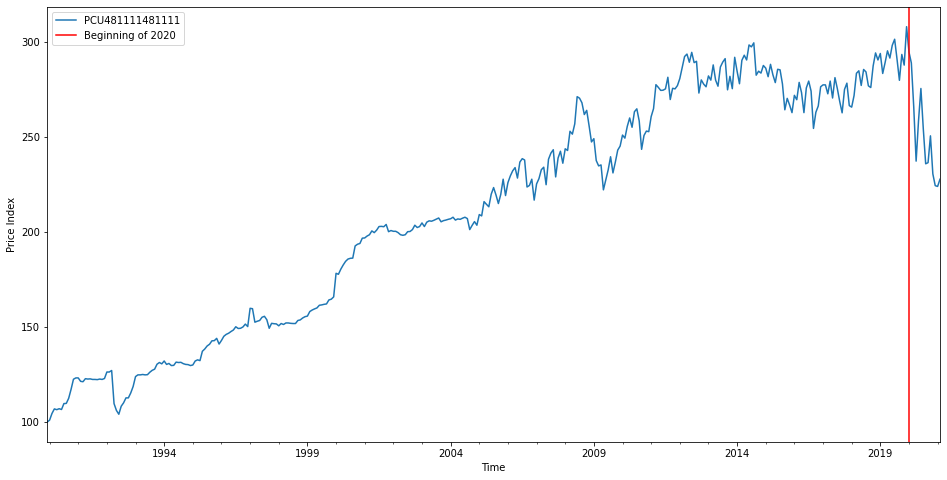

In [10]:
ax = df.plot(x='DATE', y='PCU481111481111', figsize=(16,8))
ax.set_xlabel('Time')
ax.set_ylabel('Price Index')
plt.axvline(x='2020-01-01', c='red', label='Beginning of 2020')
plt.legend();

Notice the extreme drop starting from 2020 for the price index for scheduled airline passengers. Because the purpose of this notebook is to show the basics of Prophet's abilities forecast and predict on a time series dataset, we will not be using any values from 2020-01-01 onwards. Instead, we will focus solely on the data within 1989-12-01 to 2019-12-01.

In [11]:
# Viewing the length of the dataframe
len(df)

375

In [12]:
# Figuring out which index we need to slice out to remove 2020 from the dataframe
sum(df['DATE'] > '2019-12-01')

14

In [13]:
# Confirming that the final 14 rows all consist of dates from 2020 onwards
df.iloc[-14:]

,DATE,PCU481111481111
361,2020-01-01,294.6
362,2020-02-01,288.8
363,2020-03-01,265.7
364,2020-04-01,237.2
365,2020-05-01,258.4
366,2020-06-01,275.4
367,2020-07-01,254.2
368,2020-08-01,235.8
369,2020-09-01,236.4
370,2020-10-01,250.5


In [14]:
# separating 2020 from the dataframe for the sake of simplicity for this blog
air_df = df.iloc[:-14]
air_df

,DATE,PCU481111481111
0,1989-12-01,100.0
1,1990-01-01,101.0
2,1990-02-01,104.5
3,1990-03-01,106.9
4,1990-04-01,106.5
...,...,...
356,2019-08-01,290.8
357,2019-09-01,279.7
358,2019-10-01,293.3
359,2019-11-01,287.7


In [15]:
# Saving cleaned dataframe to google drive
air_df.to_csv('/content/drive/MyDrive/gdrive/datasets/air_passenger_clean.csv',
              index=False)